<a href="https://colab.research.google.com/github/shahabasvalleri/FACIAL-EMOTION-DETECTION/blob/main/modeling_assignment_Shahabas_%26akshay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/all_sources_metadata_2020-03-13 (1).csv')

In [ ]:
df

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,c42a617a00afe6a36bde0a8e3638e0f55bfee4f7,medrxiv,NaN,doi.org/10.1101/2020.03.08.20032847,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,NaN,NaN,NaN,NaN,NaN,NaN,True
29496,c4ce14ce42fa4360dfe3515ec9d1584847381c27,medrxiv,NaN,doi.org/10.1101/2020.03.08.20032854,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,NaN,NaN,NaN,NaN,NaN,NaN,True
29497,c41e09a32be90c84cea0616bb1c726aecba721e0,medrxiv,NaN,doi.org/10.1101/2020.03.09.20032219,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,NaN,NaN,NaN,NaN,NaN,NaN,False
29498,ca88735399ff43d0e673876200655099f06f5567,medrxiv,NaN,doi.org/10.1101/2020.03.09.20033183,NaN,NaN,See https://www.medrxiv.org/submit-a-manuscript,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
df=df['title']

In [ ]:
df=df[:20000]

In [ ]:
len(df)

20000

In [ ]:
df

0        Angiotensin-converting enzyme 2 (ACE2) as a SA...
1        Comparative genetic analysis of the novel coro...
2        Incubation Period and Other Epidemiological Ch...
3        Characteristics of and Public Health Responses...
4             Imaging changes in severe COVID-19 pneumonia
                               ...                        
19995    Mutations in Coronavirus Nonstructural Protein...
19996    Influenza A Virus Protein PA-X Contributes to ...
19997    Interaction between TIM-1 and NPC1 Is Importan...
19998    HIV Blocks Interferon Induction in Human Dendr...
19999    Repurposing of the antihistamine chlorcyclizin...
Name: title, Length: 20000, dtype: object

In [ ]:
pd.set_option("display.max_colwidth", None)
df.head()

0                                                            Angiotensin-converting enzyme 2 (ACE2) as a SARS-CoV-2 receptor: molecular mechanisms and potential therapeutic target
1                                                               Comparative genetic analysis of the novel coronavirus (2019-nCoV/SARS-CoV-2) receptor ACE2 in different populations
2    Incubation Period and Other Epidemiological Characteristics of 2019 Novel Coronavirus Infections with Right Truncation: A Statistical Analysis of Publicly Available Case Data
3                                                                                  Characteristics of and Public Health Responses to the Coronavirus Disease 2019 Outbreak in China
4                                                                                                                                      Imaging changes in severe COVID-19 pneumonia
Name: title, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
STOP_WORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOP_WORDS=STOP_WORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in str(text).lower().split() if i not in STOP_WORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

In [ ]:
document_cleaned

In [ ]:
type(STOP_WORDS)

set

In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values.astype('U'))
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

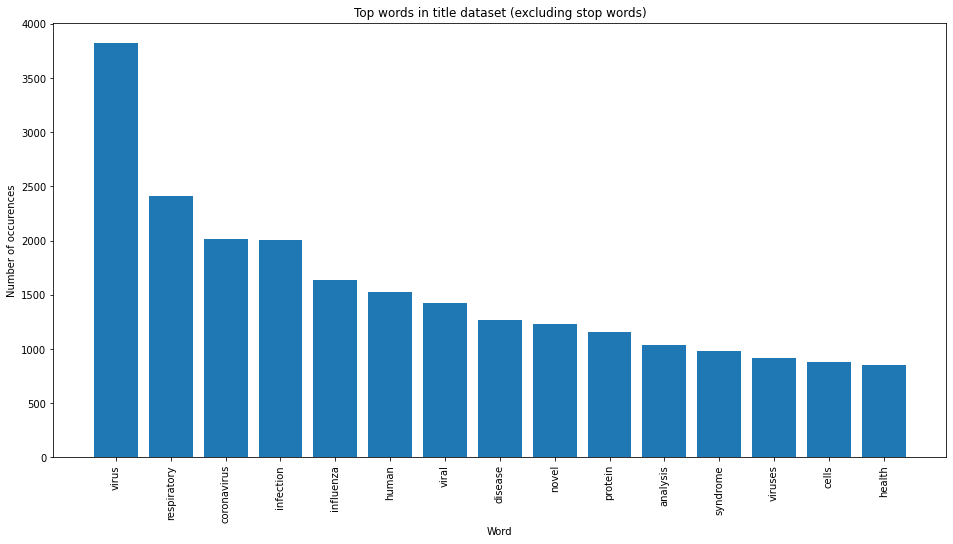

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [ ]:
df.shape[0]

20000

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tagged_journal = [TextBlob(str(df[i])).pos_tags for i in range(df.shape[0])]

In [ ]:
tagged_journal_df = pd.DataFrame({'tags':tagged_journal})

word_counts = [] 
pos_counts = {}

for journal in tagged_journal_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per journal: ', np.mean(word_counts))

Total number of words:  300000
Mean number of words per journal:  15.0


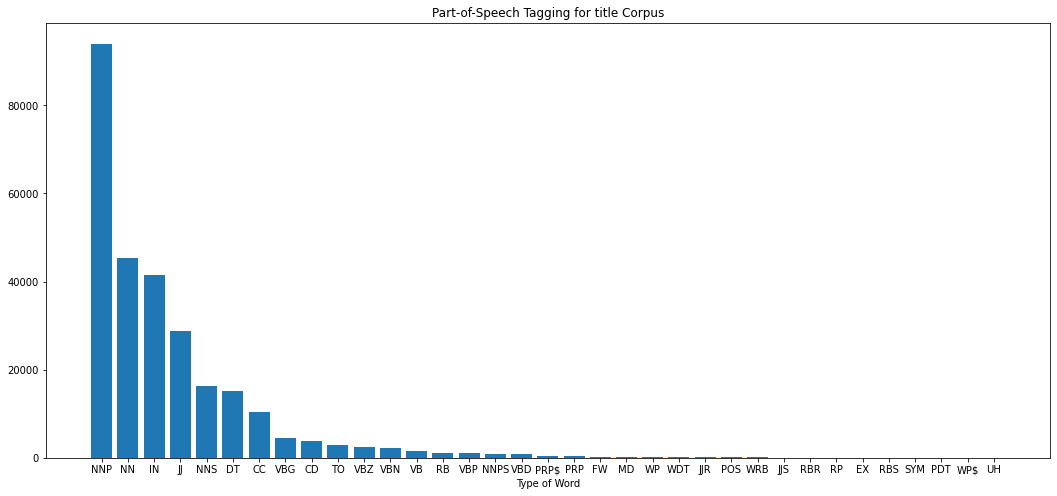

In [ ]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=10000, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: Household preparedness for emergency events: a cross-sectional survey on residents in four regions of China
Text after vectorization: 
  (0, 2775)	1
  (0, 3703)	1
  (0, 2118)	1
  (0, 5367)	1
  (0, 9006)	1
  (0, 4009)	1
  (0, 10248)	1
  (0, 11043)	1
  (0, 9760)	1
  (0, 9611)	1


In [ ]:
n_topics = 5

In [ ]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  virus respiratory syndrome infection disease protein infectious influenza analysis coronavirus
Topic 2:  bromo yl indol quinoline metarbolomics introductory genographic chasing ebola ate
Topic 3:  coronavirus novel sars health 2019 china 19 covid outbreak disease
Topic 4:  influenza human viral viruses study pandemic health using infections based
Topic 5:  infection cells protein cell viral hiv expression interferon cov antiviral


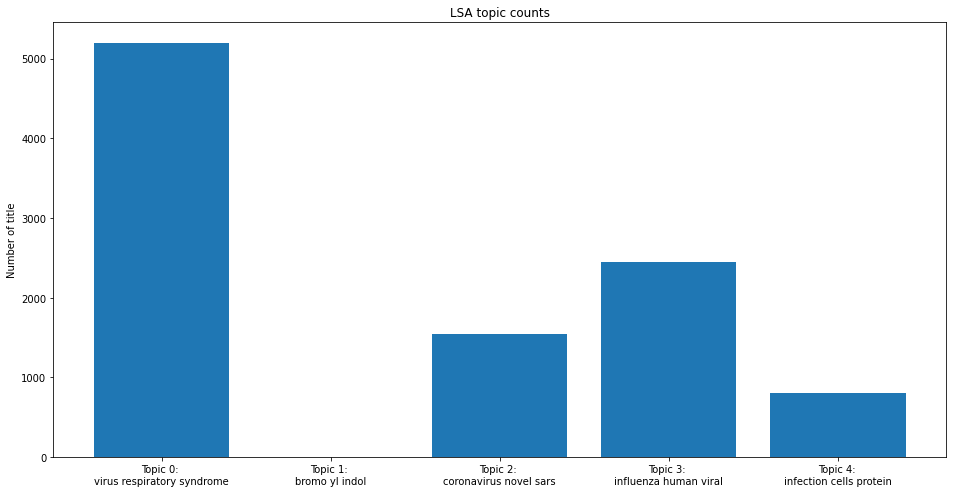

In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...
[t-SNE] Computed neighbors for 10000 samples in 0.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.015736
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.672012
[t-SNE] KL divergence after 2000 iterations: 0.803626


In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

In [ ]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [ ]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [ ]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  virus human protein cell vaccine host analysis using disease infection
Topic 2:  virus infection cells protein rna human viral influenza porcine cell
Topic 3:  respiratory acute infections viral detection virus infection children patients human
Topic 4:  health coronavirus novel 2019 19 influenza covid china public global
Topic 5:  coronavirus respiratory virus syndrome east middle disease influenza infectious mers


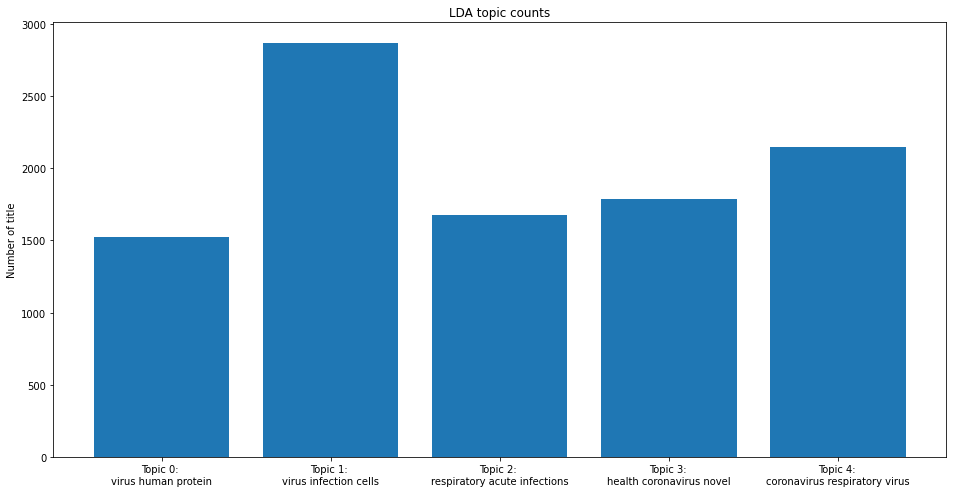

In [ ]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [ ]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 0.438s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.019432
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.923538
[t-SNE] KL divergence after 2000 iterations: 0.867214


In [ ]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [ ]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.034*"respiratory" + 0.019*"infection" + 0.017*"coronavirus" + 0.015*"syndrome" + 0.014*"disease" + 0.011*"health" + 0.011*"middle_east" + 0.010*"acute" + 0.009*"patient" + 0.009*"study"'),
 (1,
  '0.029*"virus" + 0.020*"cell" + 0.015*"infection" + 0.011*"protein" + 0.010*"human" + 0.010*"vaccine" + 0.009*"viral" + 0.009*"response" + 0.008*"mouse" + 0.007*"antiviral"'),
 (2,
  '0.023*"virus" + 0.014*"protein" + 0.013*"host" + 0.011*"porcine" + 0.008*"epidemic_diarrhea" + 0.007*"coronavirus" + 0.007*"structure" + 0.007*"analysis" + 0.006*"interaction" + 0.006*"strain"'),
 (3,
  '0.011*"characterization" + 0.010*"human" + 0.008*"genome" + 0.007*"novel" + 0.007*"molecular" + 0.007*"evolution" + 0.006*"bat" + 0.006*"genetic" + 0.006*"identification" + 0.006*"gene"'),
 (4,
  '0.016*"detection" + 0.015*"virus" + 0.013*"using" + 0.009*"ebola" + 0.009*"disease" + 0.008*"pathogen" + 0.008*"analysis" + 0.008*"influenza" + 0.007*"transmission" + 0.007*"evaluation"')]

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.041305,0.668746,0.030282,0.228744,0.030924,1
1,0.033716,0.028420,0.263321,0.645691,0.028853,3
2,0.636195,0.019343,0.020754,0.019842,0.303865,0
3,0.880156,0.030681,0.029838,0.029407,0.029919,0
4,0.805606,0.048867,0.049618,0.047485,0.048424,0


In [ ]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -8.311191867489947

Coherence Score using c_v:  0.24705320493095936

Coherence Score using u_mass:  -4.644907105682124


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=28ce7fa980b5ee3aa342beddf3179d3fe0eccd5c3c9f52eb3cd6f07e4ba74843
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d36bf84c8e98834d7e820a10483d86c934211261eec3060bfccd7e358aab3dfd
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.205911  0.049034       1        1  32.305694
1     -0.102546  0.159090       2        1  28.806028
4      0.021239 -0.074286       3        1  16.342052
2     -0.075810 -0.046814       4        1  12.849364
3     -0.048794 -0.087024       5        1   9.696862, topic_info=             Term         Freq        Total Category  logprob  loglift
129   respiratory  1989.000000  1989.000000  Default  30.0000  30.0000
146          cell  1049.000000  1049.000000  Default  29.0000  29.0000
227      syndrome   882.000000   882.000000  Default  28.0000  28.0000
24      infection  1921.000000  1921.000000  Default  27.0000  27.0000
66        protein   918.000000   918.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2923     mutation    39.222634    83.011356   Topic5  -6.0965   1.5836
139       pattern    42.226162    98.601249   Topic5  -6.0227   1.4853
16     population    42.333730   117.708935   Topic5  -6.0202   1.3107
10       analysis    60.344421   553.543729   Topic5  -5.6657   0.1171
2703   resistance    31.837597    63.798579   Topic5  -6.3051   1.6383

[270 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
7801      1  0.986453  2015
7801      2  0.005769  2015
7801      3  0.005769  2015
7801      4  0.005769  2015
7801      5  0.005769  2015
...     ...       ...   ...
644       1  0.982819  year
644       2  0.008329  year
644       3  0.008329  year
644       4  0.008329  year
644       5  0.008329  year

[1085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

In [ ]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)




[(0,
  '0.692*"virus" + 0.357*"respiratory" + 0.349*"infection" + 0.168*"influenza" + 0.157*"coronavirus" + 0.129*"human" + 0.125*"syndrome" + 0.122*"cell" + 0.117*"protein" + 0.116*"viral"'),
 (1,
  '0.588*"virus" + -0.487*"respiratory" + -0.353*"coronavirus" + -0.259*"infection" + -0.253*"syndrome" + -0.189*"middle_east" + -0.155*"acute" + 0.114*"influenza" + -0.084*"severe" + -0.080*"viral"'),
 (2,
  '0.713*"infection" + -0.381*"coronavirus" + -0.229*"syndrome" + 0.222*"viral" + -0.183*"virus" + 0.178*"cell" + -0.174*"middle_east" + -0.161*"novel" + -0.148*"disease" + -0.135*"respiratory"'),
 (3,
  '-0.466*"respiratory" + 0.375*"disease" + 0.350*"coronavirus" + 0.294*"cell" + 0.283*"novel" + 0.251*"human" + -0.179*"virus" + -0.173*"syndrome" + 0.149*"protein" + 0.133*"infectious"')]

In [ ]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.31119296591101

Coherence Score using c_v:  0.24705320493095936

Coherence Score using u_mass:  -4.644907105682124


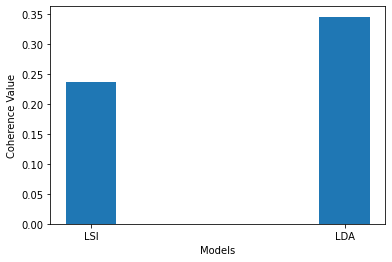

In [ ]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])